In [2]:
# =============================================
# 1. Importar las librerías necesarias
# =============================================

from pathlib import Path
import uproot
import pandas as pd
import numpy as np

In [3]:
# =============================================
# 3. Definir la ruta del archivo ROOT y el nombre del árbol
# =============================================

# Ruta al archivo ROOT 
#DTDPGNtuple_12_4_2_Phase2Concentrator_Simulation_89
ruta_archivo_root = '../dtTuples/DTDPGNtuple_12_4_2_Phase2Concentrator_Simulation_89.root'

#Fijate que pongo ../* para que busque en el directorio anterior, ya que los datos están en el directorio dtTuples, el cual esta un nivel por encima de este script

# Nombre del árbol dentro del archivo ROOT 
nombre_arbol = 'dtNtupleProducer/DTTREE;1'

In [4]:
# =============================================
# 4. Definir las ramas a extraer
# =============================================

# Lista de ramas numéricas relacionadas con 'seg'
ramas_seg_numericas = [
    "seg_nSegments",
    "seg_wheel",
    "seg_sector",
    "seg_station",
    "seg_hasPhi",
    "seg_hasZed",
    "seg_posLoc_x",
    "seg_posLoc_y",
    "seg_posLoc_z",
    "seg_dirLoc_x",
    "seg_dirLoc_y",
    "seg_dirLoc_z",
    "seg_posLoc_x_SL1",
    "seg_posLoc_x_SL3",
    "seg_posLoc_x_midPlane",
    "seg_posGlb_phi",
    "seg_posGlb_eta",
    "seg_dirGlb_phi",
    "seg_dirGlb_eta",
    "seg_phi_t0",
    "seg_phi_vDrift",
    "seg_phi_normChi2",
    "seg_phi_nHits",
    "seg_z_normChi2",
    "seg_z_nHits"
]

# Lista completa de ramas a extraer
ramas_a_extraer = [
    "event_eventNumber",  
    "digi_nDigis", "digi_wheel", "digi_sector", "digi_station", 
    "digi_superLayer", "digi_layer", "digi_wire", "digi_time",
    *ramas_seg_numericas  # Desempaqueta las ramas de 'seg'
]

In [5]:
# =============================================
# 6. Función para cargar el archivo ROOT y obtener el árbol
# =============================================

def cargar_archivo_root(ruta, arbol):
    """
    Abre un archivo ROOT y obtiene el árbol especificado.
    
    Parámetros:
        ruta (str o Path): Ruta al archivo ROOT.
        arbol (str): Nombre del árbol dentro del archivo ROOT.
        
    Retorna:
        uproot.reading.ReadOnlyTree: El árbol ROOT si se encuentra, de lo contrario None.
    """
    try:
        archivo = uproot.open(ruta)
        arbol_root = archivo[arbol]
        print(f"Árbol '{arbol}' cargado exitosamente.")
        return arbol_root
    except Exception as e:
        print(f"Error al abrir el archivo ROOT o al acceder al árbol: {e}")
        return None

![](imgs/2024-11-15-12-53-31.png)

COn la extension Root_file_viewer se puede ver el contenido de los archivos .root

Así pòdemos ver el nombre del arbol y de las variables que contiene

![](imgs/2024-11-15-12-54-57.png)

In [6]:
# =============================================
# 7. Cargar el árbol ROOT
# =============================================

# Cargar el árbol ROOT
arbol_root = cargar_archivo_root(ruta_archivo_root, nombre_arbol)

# Verificar si el árbol se cargó correctamente
if arbol_root is None:
    raise SystemExit("No se pudo cargar el árbol ROOT. Deteniendo la ejecución.")

Árbol 'dtNtupleProducer/DTTREE;1' cargado exitosamente.


In [7]:
# =============================================
# 8. Verificar las ramas disponibles en el árbol
# =============================================

# Obtener todas las ramas disponibles en el árbol
ramas_disponibles = arbol_root.keys()
print(f"Ramas disponibles en el árbol: {ramas_disponibles}")

# Identificar las ramas faltantes
ramas_faltantes = [rama for rama in ramas_a_extraer if rama not in ramas_disponibles]
if ramas_faltantes:
    print(f"Advertencia: Las siguientes ramas no se encontraron y serán omitidas: {ramas_faltantes}")
else:
    print("Todas las ramas especificadas están disponibles en el árbol.")

# Filtrar solo las ramas que existen
ramas_existentes = [rama for rama in ramas_a_extraer if rama in ramas_disponibles]
print(f"Ramas que se extraerán: {ramas_existentes}")

Ramas disponibles en el árbol: ['gen_nGenParts', 'gen_pdgId', 'gen_pt', 'gen_phi', 'gen_eta', 'gen_charge', 'event_runNumber', 'event_lumiBlock', 'event_eventNumber', 'event_timeStamp', 'event_bunchCrossing', 'event_orbitNumber', 'environment_truePileUp', 'environment_actualPileUp', 'environment_instLumi', 'environment_nPV', 'environment_pv_x', 'environment_pv_y', 'environment_pv_z', 'environment_pv_xxErr', 'environment_pv_yyErr', 'environment_pv_zzErr', 'environment_pv_xyErr', 'environment_pv_xzErr', 'environment_pv_yzErr', 'digi_nDigis', 'digi_wheel', 'digi_sector', 'digi_station', 'digi_superLayer', 'digi_layer', 'digi_wire', 'digi_time', 'ph2Digi_nDigis', 'ph2Digi_wheel', 'ph2Digi_sector', 'ph2Digi_station', 'ph2Digi_superLayer', 'ph2Digi_layer', 'ph2Digi_wire', 'ph2Digi_time', 'seg_nSegments', 'seg_wheel', 'seg_sector', 'seg_station', 'seg_hasPhi', 'seg_hasZed', 'seg_posLoc_x', 'seg_posLoc_y', 'seg_posLoc_z', 'seg_dirLoc_x', 'seg_dirLoc_y', 'seg_dirLoc_z', 'seg_posLoc_x_SL1', 'seg

In [8]:
# =============================================
# 9. Extraer las ramas y convertir a DataFrame
# =============================================

try:
    # Extraer las ramas en un DataFrame de pandas
    df = arbol_root.arrays(ramas_existentes, library="pd")
    print("Datos extraídos exitosamente en un DataFrame de pandas.")
except Exception as e:
    print(f"Error al extraer las ramas: {e}")
    raise SystemExit("No se pudo extraer los datos. Deteniendo la ejecución.")

# Mostrar las primeras filas del DataFrame
print("Vista previa del DataFrame:")
display(df.head())

# Debido al tamaño, vamos a coger solo la mitad de las filas
df = df.sample(frac=0.5)


Datos extraídos exitosamente en un DataFrame de pandas.
Vista previa del DataFrame:


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time,seg_nSegments,...,seg_posGlb_phi,seg_posGlb_eta,seg_dirGlb_phi,seg_dirGlb_eta,seg_phi_t0,seg_phi_vDrift,seg_phi_normChi2,seg_phi_nHits,seg_z_normChi2,seg_z_nHits
0,52244,120,"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864....",17,...,"[0.09168455004692078, 2.2656004428863525, 2.28...","[-0.710488498210907, 0.13620427250862122, 0.13...","[0.0009383984142914414, 2.262542247772217, 2.7...","[-0.7587687373161316, 0.8452392816543579, 0.70...","[-999.0, -4.070964336395264, -145.093307495117...","[-999.0, -0.06901435554027557, 0.0, 0.0, 0.0, ...","[-1.0, 3.083855390548706, -0.5, 30.16861534118...","[0, 7, 4, 4, 4, 5, 0, 3, 3, 4, 4, 5, 4, 6, 4, ...","[4.910408973693848, 0.06704063713550568, 0.011...","[3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, ..."
1,52251,92,"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878...",7,...,"[0.5467966794967651, 2.739610195159912, 0.5468...","[-1.000199794769287, 0.1904498189687729, -1.00...","[0.5489578247070312, 2.324812412261963, 0.5478...","[-1.141993522644043, 0.4516723155975342, -1.05...","[2.10858154296875, 69.48719024658203, 1.868632...","[0.095939502120018, -0.07863318175077438, 0.0,...","[1.475873589515686, -0.20000000298023224, 1.09...","[7, 7, 7, 7, 4, 7, 8]","[15.315128326416016, 0.996015191078186, 4.1042...","[4, 3, 4, 4, 3, 3, 3]"
2,52242,123,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312...",11,...,"[0.6781520247459412, 1.7767831087112427, -2.72...","[0.6432187557220459, -1.0228902101516724, 0.41...","[0.0984124019742012, 1.2387571334838867, -2.73...","[0.5842284560203552, -0.00031552070868201554, ...","[-30.261667251586914, 7.133979797363281, -0.92...","[-0.008547604084014893, 0.0, -0.16149273514747...","[0.41559532284736633, 1.2939088344573975, 0.87...","[8, 4, 8, 8, 8, 8, 8, 6, 8, 8, 4]","[0.03944810852408409, -1.0, 0.3956128358840942...","[4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0]"
3,52254,117,"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84...",10,...,"[0.2397647351026535, 2.3133928775787354, -2.89...","[-0.15505385398864746, -1.0206985473632812, 0....","[0.23677466809749603, 2.950246572494507, -2.78...","[-0.1499621868133545, 0.0001995824568439275, 0...","[-2.4554452896118164, 36.44190979003906, 29.25...","[-0.012762983329594135, 0.015863822773098946, ...","[0.7264447808265686, 0.28025326132774353, 0.90...","[6, 5, 5, 3, 3, 8, 4, 4, 7, 3]","[0.38897570967674255, -1.0, 0.2077392786741256...","[4, 0, 4, 4, 0, 4, 0, 3, 4, 0]"
4,52248,43,"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2

![](imgs/2024-11-15-12-44-54.png)

*Podemos descargarnos una extension de vscode que permita ver los dataframes con mayor claridad, para asi poder entender mejor los datos con los que estamos trabajando*
- **Microsoft data wrangler**

Para usarlo simplemente clicamos en el archivo que queremos ver y le damos a la opcion de "Open in data wrangler"

![](imgs/2024-11-15-12-56-36.png)

In [9]:
df.head()

,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time,seg_nSegments,...,seg_posGlb_phi,seg_posGlb_eta,seg_dirGlb_phi,seg_dirGlb_eta,seg_phi_t0,seg_phi_vDrift,seg_phi_normChi2,seg_phi_nHits,seg_z_normChi2,seg_z_nHits
176,52423,168,"[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, ...","[1, 1, 2, 2, 3, 3, 4, 4, 1, 2, 3, 4, 4, 1, 1, ...","[17, 25, 17, 26, 17, 25, 17, 26, 19, 20, 19, 4...","[604.6875, 774.21875, 945.3125, 629.6875, 660....",20,...,"[0.0022305527236312628, 0.07950907945632935, 0...","[-1.0885241031646729, -1.0859837532043457, 0.9...","[-0.22375662624835968, -0.3411121964454651, 0....","[-1.0895273685455322, -1.062584638595581, 0.24...","[74.53837585449219, -37.65227508544922, -20.26...","[-0.015593461692333221, 0.0, -0.00054089876357...","[0.7133773565292358, 0.28230443596839905, 0.25...","[6, 4, 8, 8, 8, 4, 5, 5, 5, 3, 3, 5, 7, 7, 5, ...","[1.7628861665725708, 1.7626742124557495, 0.365...","[3, 3, 4, 4, 4, 3, 0, 3, 3, 0, 0, 4, 4, 4, 4, ..."
189,52430,100,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, ...","[4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 2, 3, 4, ...","[11, 38, 38, 37, 37, 16, 17, 17, 7, 18, 19, 37...","[721.875, 669.53125, 500.78125, 635.15625, 800...",9,...,"[1.544554352760315, 2.812804937362671, -3.0266...","[-0.5039161443710327, -1.061498761177063, -0.5...","[2.504531145095825, 2.314995288848877, -2.8807...","[-0.5392575860023499, -1.0704115629196167, 0.0...","[-1.0148241519927979, -23.320964813232422, -1....","[0.0, 0.029557064175605774, 0.0, 0.0, 0.0, 0.0...","[0.12018471956253052, 3.755113363265991, 0.133...","[3, 8, 3, 8, 4, 4, 8, 8, 8]","[0.23260441422462463, 0.016105592250823975, -1...","[4, 4, 0, 4, 3, 3, 4, 4, 0]"
139,52388,163,"[2, 1, -2, -2, -2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[2, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[50, 27, 48, 48, 48, 11, 11, 11, 11, 39, 39, 3...","[776.5625, 982.03125, 815.625, 644.53125, 857....",20,...,"[2.926694631576538, 2.845914840698242, -3.0444...","[-1.002051591873169, 0.9514885544776917, 1.035...","[2.9750943183898926, 2.8446030616760254, 2.975...","[0.00023824440722819418, 0.9555742740631104, 0...","[9.607250213623047, -0.5823104381561279, 12.31...","[0.0, 0.0028294683434069157, 0.0, -999.0, -0.0...","[3.9996209144592285, 0.11738567054271698, 0.12...","[3, 8, 4, 0, 5, 7, 8, 8, 8, 8, 3, 3, 4, 4, 4, ...","[-1.0, 0.5939658880233765, -1.0, 0.69265013933...","[0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, ..."
312,52558,159,"[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, ...","[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 1, 1, ...","[3, 4, 4, 5, 11, 12, 11, 11, 4, 5, 5, 5, 5, 12...","[583.59375, 589.0625, 605.46875, 642.96875, 90...",19,...,"[-0.07925199717283249, -0.07913831621408463, -...","[-1.1316955089569092, -1.1317025423049927, -1....","[0.9928235411643982, 0.9836468696594238, 0.189...","[-0.6954646706581116, -0.7038972973823547, -1....","[-999.0, 68.6156234741211, 57.41848373413086, ...","[0.0, 0.0, 0.0, 0.0, -0.020761167630553246, 0....","[9.295270919799805, 2.435286521911621, 3.40429...","[4, 4, 4, 3, 8, 4, 4, 4, 4, 4, 4, 6, 7, 6, 8, ...","[-0.5, -0.5, -0.5, -1.0, -1.0, -1.0, -1.0, 0.3...","[4, 4, 4, 0, 0, 0, 0, 4, 4, 3, 0, 4, 3, 0, 4, ..."
260,52505,336,"[-2, -2, -2, -1, -1, -1, -2, -2, -2, -2, -2, -...","[1, 5, 5, 6, 6, 6, 10, 10, 10, 10, 10, 10, 12,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

![](imgs/2024-11-15-12-57-49.png)

Aquí podemos ver como para cada evento, tenemos un numero determinado de digis y de los segmentos que producen, que vienen ordenados por wheel, sector, station. Dentro de listas.

138	52387	21	[2, 1, 1, 2, 2, 2, 2, -2, -1, -1, -1, 2, 2, 1, 1, 1, 1, 1, 1, -2, -2]	[3, 4, 4, 6, 8, 8, 8, 9, 3, 3, 3, 8, 8, 5, 5, 5, 5, 5, 5, 13, 13]	[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]	[1, 2, 2, 1, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]	[3, 1, 2, 2, 1, 2, 3, 3, 4, 2, 3, 1, 1, 1, 1, 2, 3, 4, 4, 3, 4]	[45, 9, 10, 11, 17, 17, 16, 26, 29, 23, ..., 43, 53, 71, 71, 70, 60, 61, 10, 11]	[905, 640, 549, 604, 623, 585, 605, 708, ..., 700, 714, 740, 852, 883, 663, 852]	2	[2, 1]	[8, 5]	[1, 3]	[0, 1]	[1, 0]	[-0.5, 166]	[44.3, 0]	[0, 0]	[-1.68e-08, -0.86]	[0.837, 0]	[-0.547, -0.51]	[-999, 183]	[-999, 143]	[-999, 163]	[-2.53, 1.87]	[1.1, 0.411]	[-2.62, 3.13]	[1.21, -0.000316]	[-999, -999]	[-999, 0]	[-1, 1.43]	[0, 3]	[2.6, -1]	[3, 0]

Este es un ejemplo de una fila del df.

- 138 es el numero de fila dentro del df
- 52387 es el numero de evento
- 21 es el numero de digis que tiene el evento
- [2, 1, 1, 2, 2, 2, 2, -2, -1, -1, -1, 2, 2, 1, 1, 1, 1, 1, 1, -2, -2] es la wheel a la que pertenece cada digi
- [3, 4, 4, 6, 8, 8, 8, 9, 3, 3, 3, 8, 8, 5, 5, 5, 5, 5, 5, 13, 13] es el sector al que pertenece cada digi
- [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4] es la estacion a la que pertenece cada digi
etc.

esto nos da la idea de como estan estructurados los datos y como podemos acceder a ellos

In [10]:
# Ramas relacionadas con 'digis'
ramas_digis = [
    "event_eventNumber",
    "digi_nDigis", "digi_wheel", "digi_sector", "digi_station", 
    "digi_superLayer", "digi_layer", "digi_wire", "digi_time"
]

# Ramas relacionadas con 'segments' (seg)
ramas_segments = [
    "event_eventNumber",
    "seg_nSegments",
    "seg_wheel",
    "seg_sector",
    "seg_station",
    "seg_hasPhi",
    "seg_hasZed",
    "seg_posLoc_x",
    "seg_posLoc_y",
    "seg_posLoc_z",
    "seg_dirLoc_x",
    "seg_dirLoc_y",
    "seg_dirLoc_z",
    "seg_posLoc_x_SL1",
    "seg_posLoc_x_SL3",
    "seg_posLoc_x_midPlane",
    "seg_posGlb_phi",
    "seg_posGlb_eta",
    "seg_dirGlb_phi",
    "seg_dirGlb_eta",
    "seg_phi_t0",
    "seg_phi_vDrift",
    "seg_phi_normChi2",
    "seg_phi_nHits",
    "seg_z_normChi2",
    "seg_z_nHits"
]

# Combinar todas las ramas a extraer
ramas_a_extraer = ramas_digis + ramas_segments


In [11]:

# Extraer las ramas relacionadas con 'digis' en un DataFrame de pandas
df_digis = arbol_root.arrays(ramas_digis, library="pd")

# Extraer las ramas relacionadas con 'segments' en otro DataFrame de pandas
df_segments = arbol_root.arrays(ramas_segments, library="pd")

# Mostrar una vista previa de los DataFrames
print("Vista previa del DataFrame de 'digis':")
display(df_digis.head())

print("\nVista previa del DataFrame de 'segments':")
display(df_segments.head())


Vista previa del DataFrame de 'digis':


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time
0,52244,120,"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864...."
1,52251,92,"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878..."
2,52242,123,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312..."
3,52254,117,"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84..."
4,52248,43,"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 3, ...","[4, 44, 57, 58, 39, 43, 39, 44, 38, 38, 18, 19...","[839.84375, 464.84375, 847.65625, 853.125, 631..."



Vista previa del DataFrame de 'segments':


,event_eventNumber,seg_nSegments,seg_wheel,seg_sector,seg_station,seg_hasPhi,seg_hasZed,seg_posLoc_x,seg_posLoc_y,seg_posLoc_z,...,seg_posGlb_phi,seg_posGlb_eta,seg_dirGlb_phi,seg_dirGlb_eta,seg_phi_t0,seg_phi_vDrift,seg_phi_normChi2,seg_phi_nHits,seg_z_normChi2,seg_z_nHits
0,52244,17,"[-1, 0, 0, 0, 0, 0, -2, 1, 1, 1, 1, 2, 2, 0, 0...","[1, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 10, 10, 5, 5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.4999981224536896, 35.421932220458984, 44.46...","[66.40859985351562, -58.95674514770508, -58.95...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.768371582031...",...,"[0.09168455004692078, 2.2656004428863525, 2.28...","[-0.710488498210907, 0.13620427250862122, 0.13...","[0.0009383984142914414, 2.262542247772217, 2.7...","[-0.7587687373161316, 0.8452392816543579, 0.70...","[-999.0, -4.070964336395264, -145.093307495117...","[-999.0, -0.06901435554027557, 0.0, 0.0, 0.0, ...","[-1.0, 3.083855390548706, -0.5, 30.16861534118...","[0, 7, 4, 4, 4, 5, 0, 3, 3, 4, 4, 5, 4, 6, 4, ...","[4.910408973693848, 0.06704063713550568, 0.011...","[3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, ..."
1,52251,7,"[-2, 0, -2, -2, -2, -2, -2]","[2, 6, 2, 2, 8, 8, 8]","[1, 1, 2, 2, 2, 2, 3]","[1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1]","[-29.115989685058594, -13.594767570495605, 33....","[-26.32220458984375, 84.05804443359375, 71.450...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",...,"[0.5467966794967651, 2.739610195159912, 0.5468...","[-1.000199794769287, 0.1904498189687729, -1.00...","[0.5489578247070312, 2.324812412261963, 0.5478...","[-1.141993522644043, 0.4516723155975342, -1.05...","[2.10858154296875, 69.48719024658203, 1.868632...","[0.095939502120018, -0.07863318175077438, 0.0,...","[1.475873589515686, -0.20000000298023224, 1.09...","[7, 7, 7, 7, 4, 7, 8]","[15.315128326416016, 0.996015191078186, 4.1042...","[4, 3, 4, 4, 3, 3, 3]"
2,52242,11,"[1, -2, 1, 1, 1, 1, -1, 1, 1, 1, 1]","[2, 4, 8, 11, 2, 8, 12, 12, 8, 8, 8]","[1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 4]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]","[-28.02860450744629, 50.99497604370117, 85.469...","[32.665016174316406, 0.0, -83.4660873413086, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.6781520247459412, 1.7767831087112427, -2.72...","[0.6432187557220459, -1.0228902101516724, 0.41...","[0.0984124019742012, 1.2387571334838867, -2.73...","[0.5842284560203552, -0.00031552070868201554, ...","[-30.261667251586914, 7.133979797363281, -0.92...","[-0.008547604084014893, 0.0, -0.16149273514747...","[0.41559532284736633, 1.2939088344573975, 0.87...","[8, 4, 8, 8, 8, 8, 8, 6, 8, 8, 4]","[0.03944810852408409, -1.0, 0.3956128358840942...","[4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0]"
3,52254,10,"[0, -2, 1, 1, 1, -1, 1, -1, 0, 2]","[1, 5, 7, 7, 8, 12, 4, 12, 1, 4]","[1, 1, 1, 1, 1, 1, 2, 2, 3, 3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 0, 1, 0, 1, 1, 0]","[66.2711410522461, 56.85696792602539, -69.9512...","[69.94519805908203, 0.0, 11.396491050720215, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.2397647351026535, 2.3133928775787354, -2.89...","[-0.15505385398864746, -1.0206985473632812, 0....","[0.23677466809749603, 2.950246572494507, -2.78...","[-0.1499621868133545, 0.0001995824568439275, 0...","[-2.4554452896118164, 36.44190979003906, 29.25...","[-0.012762983329594135, 0.015863822773098946, ...","[0.7264447808265686, 0.28025326132774353, 0.90...","[6, 5, 5, 3, 3, 8, 4, 4, 7, 3]","[0.38897570967674255, -1.0, 0.2077392786741256...","[4, 0, 4, 4, 0, 4, 0, 3, 4, 0]"
4,52248,5,"[-1, -1, -1, -2, -2]","[12, 12, 4, 11, 11]","[1, 1, 2, 2, 3]","[1, 1, 1, 1, 1]","[0, 0, 0, 1, 1]","[30.186201095581055, 40.07540512084961, -40.63...","[0.0, 0.0, 0.0, -109.61477661132812, -23.50193...","[0.0, 0.0, 0.0, 0.0, 0.0]",...,"[-0.3641812801361084, -0.34191325306892395, 1....","[-0.580014169216156, -0.5780113935470581, -0.4...","[-1.6155983

Las columnas extraídas pueden contener Awkward Arrays, que son estructuras de datos que permiten listas de diferentes longitudes en cada fila. Para manipular estos datos con pandas de manera efectiva, es recomendable convertirlos a listas de Python estándar. 

convertir_a_lista: Verifica si el elemento es una lista, tupla o arreglo de numpy. Si lo es, lo convierte en una lista de Python. Si es un valor escalar, lo envuelve en una lista para mantener la consistencia.
Aplicación: Se aplica esta función a todas las columnas de ambos DataFrames para asegurar que todas las entradas sean listas de Python.

In [12]:
# Función para convertir Awkward Arrays a listas de Python
def convertir_a_lista(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return list(x)
    return [x]  # En caso de que sea un valor escalar, lo convertimos en lista

# Aplicar la conversión a todas las columnas de 'digis' que son listas ( excepto 'event_eventNumber' )  

for col in ramas_digis:
        df_digis[col] = df_digis[col].apply(convertir_a_lista)

# Aplicar la conversión a todas las columnas de 'segments'
for col in ramas_segments:
    df_segments[col] = df_segments[col].apply(convertir_a_lista)

df_digis.head()


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time
0,[52244],[120],"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864...."
1,[52251],[92],"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878..."
2,[52242],[123],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312..."
3,[52254],[117],"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84..."
4,[52248],[43],"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 3, ...","[4, 44, 57, 58, 39, 43, 39, 44, 38, 38, 18, 19...","[839.84375, 464.84375, 847.65625, 853.125, 631..."


Al aplanar correctamente todas las columnas relevantes en los DataFrames de digis y segments, aseguras que cada fila represente una única instancia (digi o segment) con atributos escalares, lo cual es esencial para un análisis preciso y la construcción de modelos de aprendizaje automático efectivos. Primero nos aseguramos de que todas las columnas relevantes sean listas de Python, y luego comprobamos que todas las listas tengan la misma longitud. Si no es así, se rellenan con valores nulos para mantener la consistencia.

In [13]:
# Definir las columnas relacionadas con 'digis' que serán aplanadas
columns_to_explode_digis = ['digi_superLayer', 'digi_layer', 'digi_wire', 'digi_time', 'digi_wheel', 'digi_sector', 'digi_station']

# Función para verificar si todas las listas tienen la misma longitud en una fila
def verificar_longitudes(row, cols):
    lengths = [len(row[col]) for col in cols]
    return len(set(lengths)) == 1  # True si todas las longitudes son iguales

# Aplicar la función a cada fila
df_digis['same_length'] = df_digis.apply(lambda row: verificar_longitudes(row, columns_to_explode_digis), axis=1)

# Verificar cuántas filas cumplen la condición
print("Número de filas con listas de la misma longitud en 'digis':")
print(df_digis['same_length'].value_counts())

# Filtrar solo las filas que cumplen la condición
df_digis = df_digis[df_digis['same_length']]

# Eliminar la columna auxiliar
df_digis = df_digis.drop(columns=['same_length'])

# Verificar nuevamente
print("\nDespués de filtrar, número de filas restantes en 'digis':")
print(len(df_digis))
df_digis.head()


Número de filas con listas de la misma longitud en 'digis':
same_length
True    439
Name: count, dtype: int64

Después de filtrar, número de filas restantes en 'digis':
439


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time
0,[52244],[120],"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864...."
1,[52251],[92],"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878..."
2,[52242],[123],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312..."
3,[52254],[117],"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84..."
4,[52248],[43],"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 3, ...","[4, 44, 57, 58, 39, 43, 39, 44, 38, 38, 18, 19...","[839.84375, 464.84375, 847.65625, 853.125, 631..."


In [14]:
# ahora vamos a aplanar las columnas de 'digis' que contienen listas
columns_to_explode_digis = [
    'digi_superLayer', 'digi_layer', 'digi_wire', 
    'digi_time', 'digi_wheel', 'digi_sector', 'digi_station'
]


df_digis_exploded = df_digis.explode(columns_to_explode_digis)

# Renombrar las columnas a nombres más cortos
df_digis_exploded = df_digis_exploded.rename(columns={
    "event_eventNumber": "eventNumber",
    "digi_superLayer": "superLayer",
    "digi_layer": "layer",
    "digi_wire": "wire",
    "digi_time": "time",
    "digi_wheel": "wheel",
    "digi_sector": "sector",
    "digi_station": "station"
})

# Convertir 'event_eventNumber' a entero, ya que antes era una lista
df_digis_exploded['eventNumber'] = df_digis_exploded['eventNumber'].apply(lambda x: x if isinstance(x, (int, str)) else x[0])

# Eliminar la columna 'digi_nDigis' ya que no es necesaria, puesto que cuenta el numero de digis en cada evento, no de cada estación
df_digis_exploded = df_digis_exploded.drop(columns=['digi_nDigis'])
# ELiminamos los digis de la superLayer 2, ya que no son necesarios y pueden influir en los resultados
df_digis_exploded = df_digis_exploded[df_digis_exploded['superLayer'] != 2]
print("Preview of 'df_digis_exploded':")
display(df_digis_exploded.head())

Preview of 'df_digis_exploded':


,eventNumber,wheel,sector,station,superLayer,layer,wire,time
0,52244,0,5,1,1,1,33,710.15625
0,52244,0,5,1,1,1,33,864.84375
0,52244,0,5,1,1,1,34,527.34375
0,52244,0,5,1,1,2,34,646.875
0,52244,0,5,1,1,2,35,752.34375


In [1]:
# Ahora vamos a agrupar los digis por evento y estación
df_digis_grouped = df_digis_exploded.groupby(
    ['eventNumber', 'wheel', 'sector', 'station']
).agg({
    'superLayer': list,
    'layer': list,
    'wire': list,
    'time': list
}).reset_index()

df_digis_grouped['n_digis'] = df_digis_grouped['wire'].apply(len)

# Mostrar una vista previa después de aplanar
print("Vista previa del DataFrame de 'digis' después de aplanar:")
display(df_digis_grouped.head())
df_digis_grouped.head()
tamaño_bytes = df_digis_grouped.memory_usage(deep=True).sum()
print(f"Tamaño del DataFrame en bytes: {tamaño_bytes}")


NameError: name 'df_digis_exploded' is not defined

In [15]:
# Eliminar columnas de segmentos con las que no vamos a trabajar (todas menos 'event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station')
#Esto es porque de momento queremos solo predecir si hay o no segmentos en una estación, no cuantos ni su posición.

columnas_a_eliminar = [col for col in df_segments.columns if col not in ['event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station', 'seg_hasPhi']]

df_segments_filtered = df_segments.drop(columns=columnas_a_eliminar)

# Nos aseguramos de que 'event_eventNumber' sea un escalar, ya que antes convertimos todas las columnas a listas
df_segments_filtered['event_eventNumber'] = df_segments['event_eventNumber'].str[0]

# Explotamos para crear una fila por estación y ver si es un segmento en phi (SL1 + SL3)
df_exploded = df_segments_filtered.explode(['seg_wheel', 'seg_sector', 'seg_station', 'seg_hasPhi'])
df_segments_phi = df_exploded[df_exploded['seg_hasPhi'] == 1]
# Agrupamos y añadir una columna con el número de segmentos. Esta columna calcula el número de segmentos por evento, estación, sector y rueda. 
# Esto lo hace contando el número de filas que comparten el mismo conjunto de valores en las columnas 'event_eventNumber', 'seg_wheel', 'seg_sector' y 'seg_station'.
df_counts = (
    df_segments_phi
    .groupby(['event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station'])
    .size()
    .reset_index(name='n_segments')
)

#Renombramos las columnas para mayor claridad

df_counts = df_counts.rename(columns={
    'event_eventNumber': 'eventNumber',
    'seg_wheel': 'wheel',
    'seg_sector': 'sector',
    'seg_station': 'station'
})


# The resulting DataFrame
print(df_counts)

      eventNumber  wheel  sector  station  n_segments
0           52242     -2       4        1           1
1           52242     -1      12        2           1
2           52242      1       2        1           1
3           52242      1       2        2           1
4           52242      1       8        1           1
...           ...    ...     ...      ...         ...
3958        52680      1      11        2           1
3959        52680      1      11        3          10
3960        52680      1      11        4           1
3961        52680      2       1        1           1
3962        52680      2       8        1           1

[3963 rows x 5 columns]


In [16]:
# Hacemos lo mismo que con los digis, agrupamos los segmentos por evento y estación
df_merged = pd.merge(
    df_digis_grouped,
    df_counts,
    how='left',
    on=['eventNumber', 'wheel', 'sector', 'station']
)

# Fill NaN values in 'n_segments' with 0 (indicating no segments)
df_merged['n_segments'] = df_merged['n_segments'].fillna(0).astype(int)

# Define classification target: 1 if at least one segment, else 0
df_merged['has_segment'] = (df_merged['n_segments'] > 0).astype(int)

# Display a preview of the merged DataFrame
print("Preview of 'df_merged':")
display(df_merged.head())
df_merged.head()

Preview of 'df_merged':


,eventNumber,wheel,sector,station,superLayer,layer,wire,time,n_digis,n_segments,has_segment
0,52242,-2,4,1,"[1, 1, 1, 1]","[1, 2, 3, 4]","[39, 39, 38, 39]","[783.59375, 535.9375, 857.03125, 646.09375]",4,1,1
1,52242,-1,12,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[8, 9, 8, 9, 9, 10, 9, 10]","[593.75, 667.96875, 603.125, 660.15625, 641.40...",8,1,1
2,52242,1,2,1,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 17, 17, 20, 20, 20, 20]","[828.125, 553.90625, 662.5, 770.3125, 853.9062...",8,1,1
3,52242,1,2,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 16, 17, 16, 17, 16, 17]","[535.9375, 757.8125, 632.03125, 660.15625, 632...",8,1,1
4,52242,1,5,1,"[1, 1]","[1, 2]","[41, 42]","[596.09375, 667.1875]",2,0,0


,eventNumber,wheel,sector,station,superLayer,layer,wire,time,n_digis,n_segments,has_segment
0,52242,-2,4,1,"[1, 1, 1, 1]","[1, 2, 3, 4]","[39, 39, 38, 39]","[783.59375, 535.9375, 857.03125, 646.09375]",4,1,1
1,52242,-1,12,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[8, 9, 8, 9, 9, 10, 9, 10]","[593.75, 667.96875, 603.125, 660.15625, 641.40...",8,1,1
2,52242,1,2,1,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 17, 17, 20, 20, 20, 20]","[828.125, 553.90625, 662.5, 770.3125, 853.9062...",8,1,1
3,52242,1,2,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 16, 17, 16, 17, 16, 17]","[535.9375, 757.8125, 632.03125, 660.15625, 632...",8,1,1
4,52242,1,5,1,"[1, 1]","[1, 2]","[41, 42]","[596.09375, 667.1875]",2,0,0


La mayoría de las arquitecturas de redes neuronales, especialmente las Redes Neuronales Feedforward (también conocidas como Multilayer Perceptrons o MLPs), esperan que los datos de entrada tengan un tamaño fijo y una estructura vectorial plana. Esto significa que cada muestra de entrada debe representarse como un vector de valores numéricos de longitud constante. Por ejemplo, si tu vector de entrada tiene 10 características, cada muestra alimentada a la red debe tener exactamente 10 valores numéricos.

Las características que son listas (por ejemplo, superLayer, layer, wire, time en tu conjunto de datos) pueden variar en longitud entre diferentes muestras. Por ejemplo:

    Muestra 1: superLayer = [1, 1, 1, 1]
    Muestra 2: superLayer = [1, 1, 1, 1, 3, 3, 3, 3]

Las redes neuronales no pueden procesar directamente entradas donde las dimensiones de las características varían, ya que interrumpe el requisito de tamaño fijo. Por lo tanto, necesitas convertir estas características en un formato que pueda ser procesado por una red neuronal.

varias formas de hacerlo:

- **Padding**: Añadir ceros a las características más cortas para que todas tengan la misma longitud.
- **Truncamiento**: Eliminar elementos de las características más largas para que todas tengan la misma longitud.
- **One-hot encoding**: Convertir las características en vectores binarios de longitud fija.
- **Embedding**: Representar las características como vectores densos de longitud fija.
- **Bucketing**: Agrupar las características en grupos de longitud fija.
- **Statistical Aggregation**: Calcular estadísticas resumidas de las características variables.
- **RNNs**: Utilizar redes neuronales recurrentes para procesar secuencias de longitud variable.
- **CNNs**: Utilizar redes neuronales convolucionales para procesar secuencias de longitud variable.
- **Transformers**: Utilizar modelos de atención para procesar secuencias de longitud variable.
- **Graph Neural Networks**: Utilizar redes neuronales para procesar datos estructurados como grafos.

En este caso, vamos a utilizar el enfoque de one hot encoding para convertir las características de longitud variable en vectores binarios de longitud fija.
Como la caracteristica con mayor logitud variable es el wire, vamos a hacer one hot encoding de esta caracteristica

Para hacer one hot encoding de una caracteristica, primero necesitas determinar cuántas categorías únicas hay en esa característica. Luego, puedes crear una matriz de ceros de tamaño (número de muestras, número de categorías únicas) y asignar un 1 en la columna correspondiente a la categoría de cada muestra.

En nuestro caso, hay 2 superLayers únicos, 4 layers únicos, y el maximo numero de wires es 102 en la MB4. Por lo tanto, necesitamos crear una matriz de ceros de ese tamaño y asignar un 1 en la columna correspondiente a la categoría de cada muestra.


In [45]:
import numpy as np

NUM_SUPERLAYERS = 2  # Supercapas 1 y 3
NUM_LAYERS_PER_SUPERLAYER = 4
NUM_WIRES_PER_LAYER = 102 #maximo numero de cables

def crear_características_cables(superLayers, layers, wires):
    vector_características = np.zeros(NUM_SUPERLAYERS * NUM_LAYERS_PER_SUPERLAYER * NUM_WIRES_PER_LAYER)
    for sl, layer, wire in zip(superLayers, layers, wires):
        # Mapear superLayer a índices 0 y 1
        sl_index = (sl - 1) // 2  # Convierte superLayer 1 y 3 a índices 0 y 1
        layer_index = (layer - 1)
        wire_index = (wire - 1)
        index = sl_index * NUM_LAYERS_PER_SUPERLAYER * NUM_WIRES_PER_LAYER + \
                layer_index * NUM_WIRES_PER_LAYER + wire_index
        vector_características[int(index)] = 1
    return vector_características

# Aplicar esta función al DataFrame
df_digis_grouped['características_cables'] = df_digis_grouped.apply(
    lambda row: crear_características_cables(row['superLayer'], row['layer'], row['wire']), axis=1
)


Ahora, vamos a intentar predecir algo muy basico, como si hay o no un segmento en una estacion, sector y wheel determinados. Para ello, hemos construido las caracteristicas de combinacion de superlayer, layer y wire, para cada combinacion de estacion, sector y wheel. Ahora vamos a intentar predecir si hay o no un segmento en esa combinacion. PAra ello vamos a usar dos modelos basicos, un random forest y un MLP.

- Random forest: Es un modelo de ensamble que se ajusta a varios árboles de decisión en diferentes subconjuntos de datos y promedia sus predicciones para mejorar la precisión y controlar el sobreajuste. Es un modelo no paramétrico que no requiere normalización de características y es robusto a valores atípicos y datos faltantes. Es fácil de interpretar y puede manejar características categóricas y numéricas. Sin embargo, puede ser lento en conjuntos de datos grandes y no es adecuado para datos de alta dimensionalidad.
- MLP: Es un tipo de red neuronal artificial que consta de múltiples capas de nodos, donde cada nodo está conectado a todos los nodos de la capa anterior. Es un modelo paramétrico que requiere normalización de características y es sensible a valores atípicos y datos faltantes. Puede manejar características categóricas y numéricas, y es adecuado para datos de alta dimensionalidad. Sin embargo, puede ser propenso al sobreajuste y requiere una selección cuidadosa de la arquitectura y los hiperparámetros.

In [56]:
# Extraer las características y la variable objetivo
X = np.stack(df_merged['características_cables'].values)
y = df_merged['has_segment']


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       543
           1       0.92      0.88      0.90       840

    accuracy                           0.88      1383
   macro avg       0.87      0.88      0.87      1383
weighted avg       0.88      0.88      0.88      1383



Interpretación de los Resultados

1. Precisión (Precision):

    Clase 0 (No tiene segmento): 0.85
    Clase 1 (Tiene segmento): 0.91

La precisión mide la proporción de verdaderos positivos sobre el total de positivos predichos. Una precisión de 0.85 para la clase 0 significa que el 85% de las veces que el modelo predice que no hay segmento, está en lo correcto. Para la clase 1, el modelo tiene una precisión del 91%.

2. Exhaustividad (Recall):

    Clase 0: 0.87
    Clase 1: 0.89

La exhaustividad (o sensibilidad) mide la proporción de verdaderos positivos sobre el total de positivos reales. Un recall de 0.87 para la clase 0 indica que el modelo captura el 87% de todos los casos reales donde no hay segmento. Para la clase 1, captura el 89% de los casos reales donde hay segmento.

3. Puntaje F1 (F1-score):

    Clase 0: 0.86
    Clase 1: 0.90

El puntaje F1 es la media armónica de la precisión y la exhaustividad. Es una medida general del rendimiento del modelo para cada clase.

4. Soporte (Support):

    Clase 0: 570
    Clase 1: 813

El soporte es el número de muestras reales de cada clase en el conjunto de prueba.

5. Exactitud General (Accuracy):

    Exactitud: 0.88

El modelo tiene una exactitud del 88%, lo que significa que predice correctamente el 88% de los casos en el conjunto de prueba.
Análisis

    Buen Rendimiento General: Un 88% de exactitud es un buen punto de partida. El modelo está funcionando razonablemente bien en ambas clases.

    Clases Moderadamente Balanceadas: El soporte muestra que tienes 570 muestras de la clase 0 y 813 de la clase 1 en el conjunto de prueba. Aunque no es perfectamente balanceado, no hay un desequilibrio extremo.

    Diferencia en Rendimiento entre Clases: La clase 1 tiene una precisión y un puntaje F1 ligeramente superiores. Esto podría deberse a que los eventos con segmentos tienen patrones más consistentes o características más distintivas que el modelo puede capturar mejor.

In [48]:
#Vamos a probar con un MLP

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



In [49]:
# Extraer las características y la variable objetivo
X = np.stack(df_merged['características_cables'].values)
y = df_merged['has_segment']


In [ ]:
#Es recomendable estandarizar las características antes de entrenar un MLP.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
#Define la arquitectura de la red. Por ejemplo, una red con dos capas ocultas de 100 y 50 neuronas respectivamente.

modelo_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [54]:
# Predecir en el conjunto de prueba
y_pred = modelo_mlp.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       621
           1       0.90      0.92      0.91       762

    accuracy                           0.90      1383
   macro avg       0.90      0.90      0.90      1383
weighted avg       0.90      0.90      0.90      1383



Comparacion de modelos:

Asegúrate de que tienes entrenados ambos modelos y que has realizado predicciones en el conjunto de prueba. Luego, puedes comparar los resultados de ambos modelos utilizando métricas de evaluación como la exactitud, la precisión, la exhaustividad y el puntaje F1. También puedes visualizar las curvas ROC y las matrices de confusión para evaluar el rendimiento de los modelos.

In [55]:
# Supongamos que ya tienes:
# X_train, X_test, y_train, y_test
# modelo_rf: tu modelo Random Forest entrenado
# modelo_mlp: tu modelo MLP entrenado

# Realizar predicciones de probabilidad para calcular las curvas ROC y Precision-Recall
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]
y_prob_mlp = modelo_mlp.predict_proba(X_test)[:, 1]

# Realizar predicciones de clase para las matrices de confusión
y_pred_rf = modelo_rf.predict(X_test)
y_pred_mlp = modelo_mlp.predict(X_test)


Curvas ROC

Las curvas ROC te permiten visualizar la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación.

1. Curvas ROC (Receiver Operating Characteristic) y AUC (Área Bajo la Curva)
¿Qué es la Curva ROC?

La curva ROC es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de clasificación. Cada punto en la curva representa un par (FPR, TPR) para un umbral específico.

    Tasa de Verdaderos Positivos (TPR): También conocida como Recall o Sensibilidad, es la proporción de casos positivos correctamente identificados.
    TPR=Verdaderos PositivosTotal Positivos Reales
    TPR=Total Positivos RealesVerdaderos Positivos​

    Tasa de Falsos Positivos (FPR): Es la proporción de casos negativos que son incorrectamente clasificados como positivos.
    FPR=Falsos PositivosTotal Negativos Reales
    FPR=Total Negativos RealesFalsos Positivos​

¿Qué es el AUC (Área Bajo la Curva)?

El AUC es un valor numérico que resume la curva ROC en un solo número que oscila entre 0 y 1. Un AUC de 0.5 indica un modelo sin capacidad de discriminación (equivalente a una clasificación aleatoria), mientras que un AUC de 1.0 indica un modelo perfecto.
¿Cómo interpretar la Curva ROC y el AUC?

    Forma de la Curva ROC:
        Una curva que se acerca al esquina superior izquierda del gráfico (alta TPR y baja FPR) indica un mejor rendimiento.
        Una curva cercana a la diagonal (línea punteada) indica un modelo que no es mejor que una clasificación aleatoria.

    AUC:
        AUC cercano a 1.0: Excelente capacidad de discriminación.
        AUC alrededor de 0.5: Sin capacidad discriminativa.
        Comparación de AUC entre modelos: Un modelo con un AUC más alto tiene mejor rendimiento en general.

Si el modelo Random Forest tiene un AUC de 0.92 y el MLP tiene un AUC de 0.88, podemos decir que el Random Forest tiene una mejor capacidad para distinguir entre clases positivas y negativas en general.

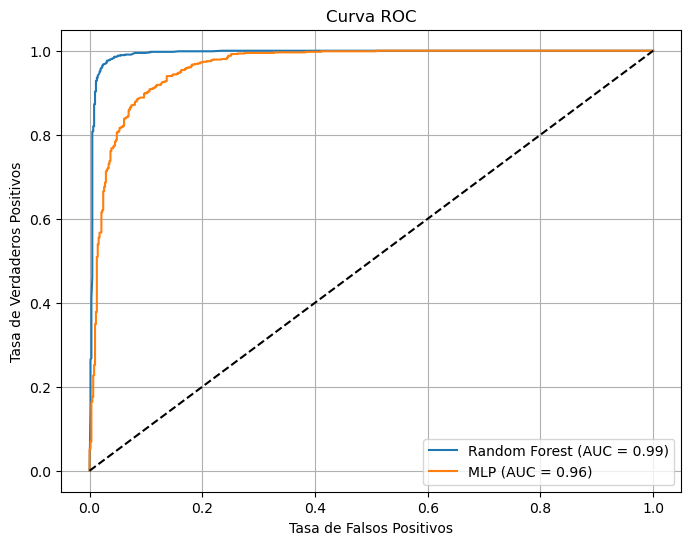

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las curvas ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Curvas Precision-Recall

Las curvas Precision-Recall son especialmente útiles cuando las clases están desbalanceadas.


La curva Precision-Recall muestra la relación entre la Precisión y el Recall para diferentes umbrales de clasificación.

    Precisión (Precision): Proporción de verdaderos positivos sobre el total de positivos predichos.
    Precisioˊn=Verdaderos PositivosVerdaderos Positivos+Falsos Positivos
    Precisioˊn=Verdaderos Positivos+Falsos PositivosVerdaderos Positivos​

    Recall: Proporción de verdaderos positivos sobre el total de positivos reales.
    Recall=Verdaderos PositivosVerdaderos Positivos+Falsos Negativos
    Recall=Verdaderos Positivos+Falsos NegativosVerdaderos Positivos​

¿Qué es el Average Precision (AP)?

El AP es una medida que resume la curva Precision-Recall en un solo valor. Es similar al AUC, pero aplicado a la curva Precision-Recall.
¿Cómo interpretar la Curva Precision-Recall y el AP?

    Forma de la Curva Precision-Recall:
        Una curva que mantiene una alta precisión a medida que aumenta el recall es indicativa de un buen modelo.
        Una caída abrupta en la precisión al aumentar el recall sugiere que el modelo está generando más falsos positivos.

    AP:
        AP alto (cercano a 1.0): Mejor rendimiento en términos de precisión y recall.
        Comparación de AP entre modelos: Un modelo con AP más alto es preferible.

Implicaciones para tus modelos

    Si el Random Forest tiene un AP de 0.90 y el MLP tiene un AP de 0.85, el Random Forest está manejando mejor el equilibrio entre precisión y recall, especialmente en situaciones donde las clases pueden estar desbalanceadas.

1. Matrices de Confusión
¿Qué es una Matriz de Confusión?

Es una tabla que muestra el número de predicciones correctas e incorrectas desglosadas por cada clase. Tiene la siguiente estructura:
	Predicción Positiva	Predicción Negativa
Clase Positiva Real	Verdaderos Positivos (VP)	Falsos Negativos (FN)
Clase Negativa Real	Falsos Positivos (FP)	Verdaderos Negativos (VN)
¿Cómo interpretar la Matriz de Confusión?

    Verdaderos Positivos (VP): Casos positivos correctamente predichos.
    Verdaderos Negativos (VN): Casos negativos correctamente predichos.
    Falsos Positivos (FP): Casos negativos incorrectamente predichos como positivos (Error Tipo I).
    Falsos Negativos (FN): Casos positivos incorrectamente predichos como negativos (Error Tipo II).

Implicaciones de los valores

    Alto número de VP y VN: Indica buen rendimiento.
    Alto número de FP: El modelo está clasificando incorrectamente negativos como positivos.
    Alto número de FN: El modelo está pasando por alto casos positivos.

Comparación entre modelos

    Al comparar las matrices de confusión de ambos modelos, puedes identificar cuál está cometiendo más errores y de qué tipo.

Implicaciones para tus modelos

    Si el MLP tiene más FN que el Random Forest, podría estar pasando por alto casos positivos importantes.
    Si el Random Forest tiene más FP, podría estar generando más alarmas falsas.

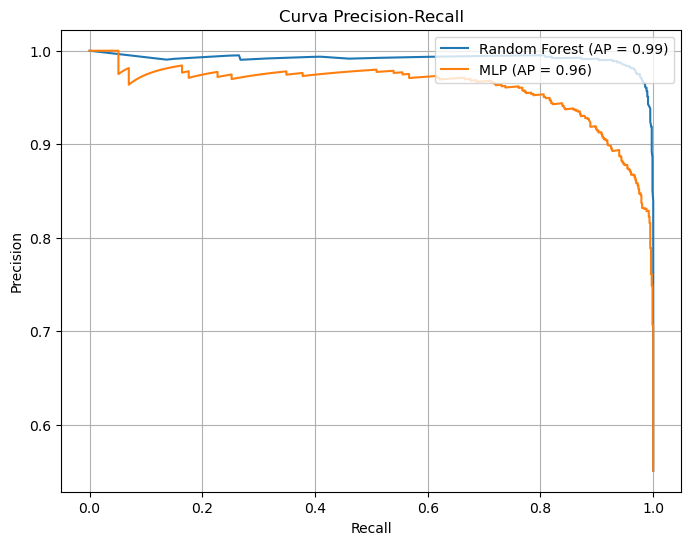

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular las curvas Precision-Recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
average_precision_rf = average_precision_score(y_test, y_prob_rf)

precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_prob_mlp)
average_precision_mlp = average_precision_score(y_test, y_prob_mlp)

# Graficar las curvas Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.plot(recall_mlp, precision_mlp, label=f'MLP (AP = {average_precision_mlp:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Métricas de Precisión, Recall y F1-Score

Estas métricas se derivan de la matriz de confusión y proporcionan una medida más detallada del rendimiento del modelo.
Precisión (Precision)

    Definición: Proporción de predicciones positivas correctas sobre el total de predicciones positivas.

    Interpretación: Alta precisión significa pocos falsos positivos.

    Fórmula:
    Precisioˊn=VPVP+FP
    Precisioˊn=VP+FPVP​

Recall (Sensibilidad)

    Definición: Proporción de casos positivos correctamente identificados.

    Interpretación: Alto recall significa pocos falsos negativos.

    Fórmula:
    Recall=VPVP+FN
    Recall=VP+FNVP​

F1-Score

    Definición: Media armónica de la precisión y el recall.

    Interpretación: Equilibra precisión y recall; útil cuando hay un desbalance entre FP y FN.

    Fórmula:
    F1-Score=2×Precisioˊn×RecallPrecisioˊn+Recall
    F1-Score=2×Precisioˊn+RecallPrecisioˊn×Recall​

Implicaciones para tus modelos

    Modelo con alta precisión pero bajo recall: El modelo es estricto al predecir positivos, resultando en pocos FP pero potencialmente más FN.
    Modelo con alto recall pero baja precisión: El modelo captura la mayoría de los positivos reales pero también genera más FP.

Ejemplo de Interpretación

Si para la clase positiva:

    Random Forest: Precisión = 0.90, Recall = 0.88, F1-Score = 0.89
    MLP: Precisión = 0.85, Recall = 0.91, F1-Score = 0.88

Interpretación:

    Random Forest tiene mayor precisión, por lo que comete menos FP.
    MLP tiene mayor recall, capturando más casos positivos pero a costa de más FP.
    El F1-Score es similar, lo que indica un rendimiento global comparable.

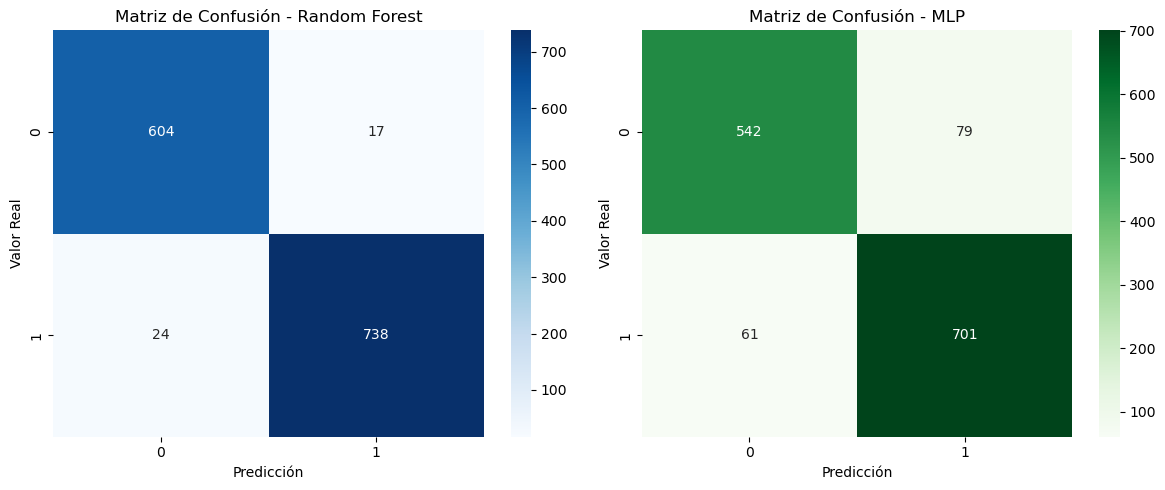

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Matriz de confusión para MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Graficar ambas matrices lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusión - Random Forest')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusión - MLP')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()


 Curvas de Pérdida (Solo para MLP)

¿Qué es la Curva de Pérdida?

Es una gráfica que muestra cómo disminuye la función de pérdida (error) del modelo durante el proceso de entrenamiento a través de las iteraciones (épocas).
¿Cómo interpretar la Curva de Pérdida?

    Disminución Continua: Una pérdida que disminuye de manera constante indica que el modelo está aprendiendo correctamente.
    Estancamiento: Si la pérdida se estabiliza, el modelo puede haber alcanzado un mínimo local o el límite de aprendizaje dado el modelo actual.
    Oscilaciones: Fluctuaciones significativas pueden indicar una tasa de aprendizaje demasiado alta o datos ruidosos.
    No Convergencia: Si la pérdida no disminuye, el modelo no está aprendiendo; puede ser necesario ajustar hiperparámetros.

Implicaciones para tu modelo

    Si la curva de pérdida del MLP disminuye y se estabiliza en un valor bajo, el modelo ha convergido adecuadamente.
    Si la pérdida sigue siendo alta o no disminuye, considera ajustar parámetros como la tasa de aprendizaje, número de neuronas o capas, o incluso preprocesar mejor los datos.

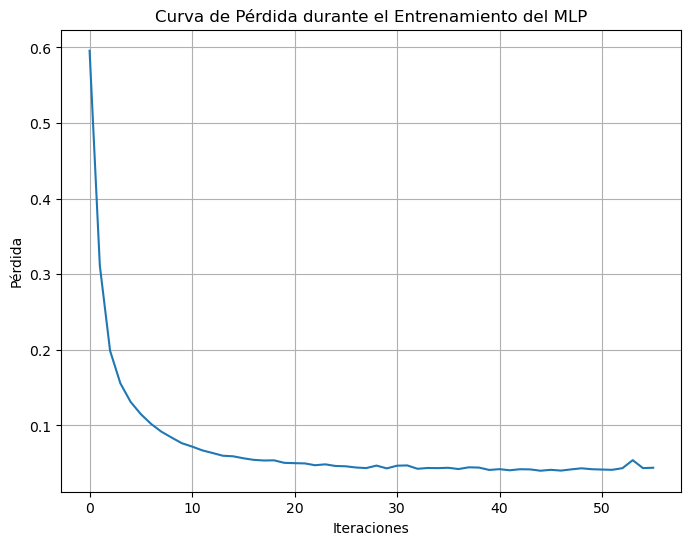

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(modelo_mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento del MLP')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


Importancia de Características (Solo para Random Forest)

¿Qué es la Importancia de las Características?

En modelos como Random Forest, la importancia de una característica mide cuánto contribuye dicha característica a la reducción del error en la predicción.
¿Cómo interpretar la Importancia de las Características?

    Valores Altos: Características con mayor influencia en las decisiones del modelo.
    Valores Bajos o Cero: Características que aportan poco o nada al modelo; podrían ser candidatas para ser eliminadas.

Implicaciones

    Identificación de Características Clave: Puedes enfocarte en las características más importantes para entender mejor el fenómeno o simplificar el modelo.
    Reducción de Dimensionalidad: Eliminar características menos importantes puede reducir el sobreajuste y mejorar la interpretabilidad.

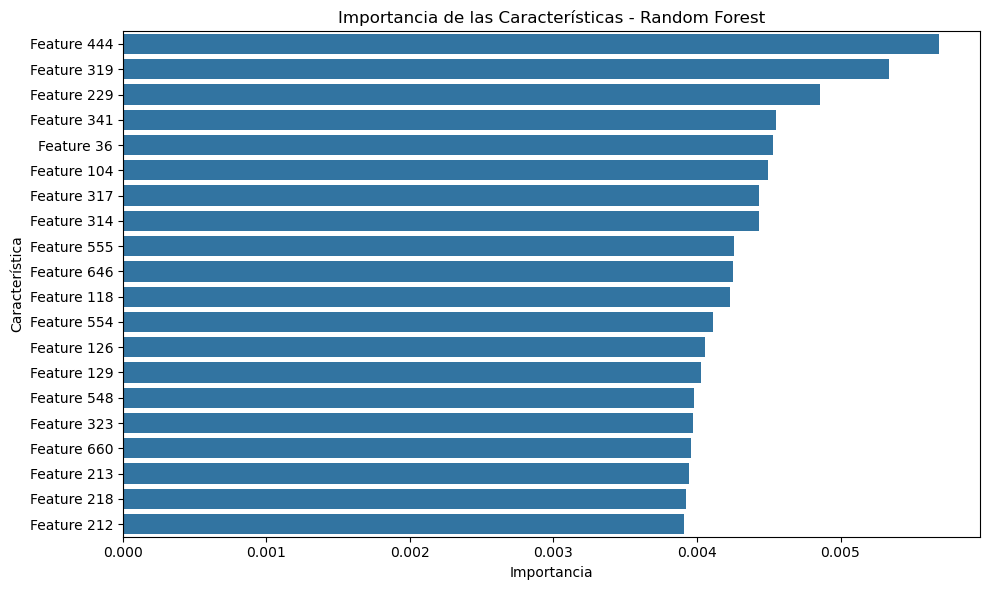

In [36]:
importances = modelo_rf.feature_importances_

# Si tienes nombres de características, puedes usarlos. De lo contrario, usa índices.
# Supongamos que tienes una lista 'feature_names' con los nombres de las características.
# Si no la tienes, puedes crearla o usar índices.

# Generar nombres de características si no existen
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Crear un DataFrame con las importancias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).head(20)  # Las 20 más importantes

# Graficar las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


Comparación de Métricas en un Gráfico de Barras

Puedes comparar métricas como precisión, exhaustividad y puntaje F1 en un solo gráfico.

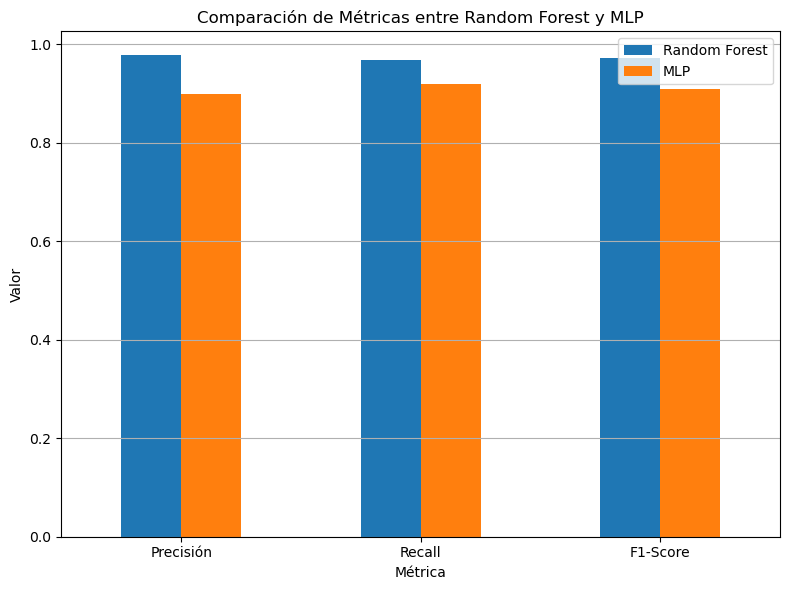

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas para Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calcular métricas para MLP
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Precisión', 'Recall', 'F1-Score'],
    'Random Forest': [precision_rf, recall_rf, f1_rf],
    'MLP': [precision_mlp, recall_mlp, f1_mlp]
})

# Graficar las métricas
metrics_df.set_index('Métrica', inplace=True)
metrics_df.plot.bar(figsize=(8, 6))
plt.title('Comparación de Métricas entre Random Forest y MLP')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Curvas de Aprendizaje (Learning Curves)
¿Qué es la Curva de Aprendizaje?

Es una gráfica que muestra el rendimiento del modelo en los conjuntos de entrenamiento y validación a medida que varía el tamaño del conjunto de entrenamiento.
¿Cómo interpretar la Curva de Aprendizaje?

    Bias Alto:
        Baja puntuación en entrenamiento y validación.
        Causa: El modelo es demasiado simple y no captura la complejidad de los datos.
        Solución: Aumentar la complejidad del modelo (más capas, más neuronas).

    Varianza Alta:
        Alta puntuación en entrenamiento pero baja en validación.
        Causa: El modelo se ajusta demasiado a los datos de entrenamiento (sobreajuste).
        Solución: Regularización, más datos, simplificar el modelo.

    Buen Ajuste:
        Las puntuaciones de entrenamiento y validación convergen en un valor alto.
        Interpretación: El modelo generaliza bien y tiene un buen rendimiento.

Implicaciones para tus modelos

    Si las curvas convergen en un valor alto, el modelo está generalizando bien.
    Si hay una brecha significativa entre las curvas, podrías necesitar ajustar el modelo para reducir el sobreajuste o subajuste.

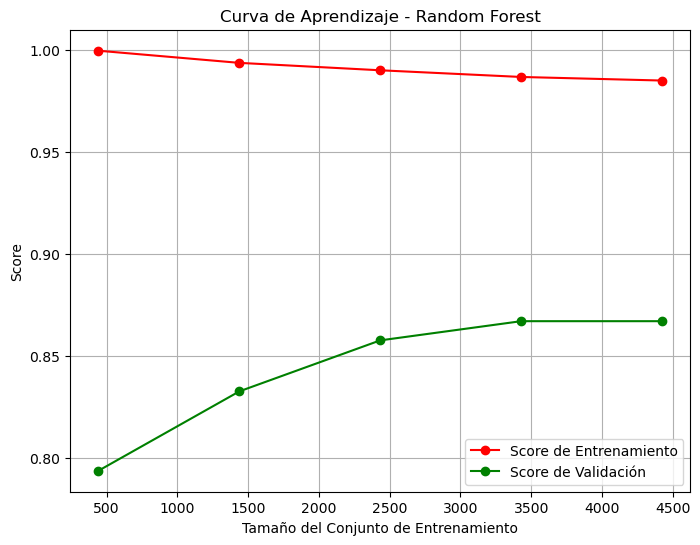

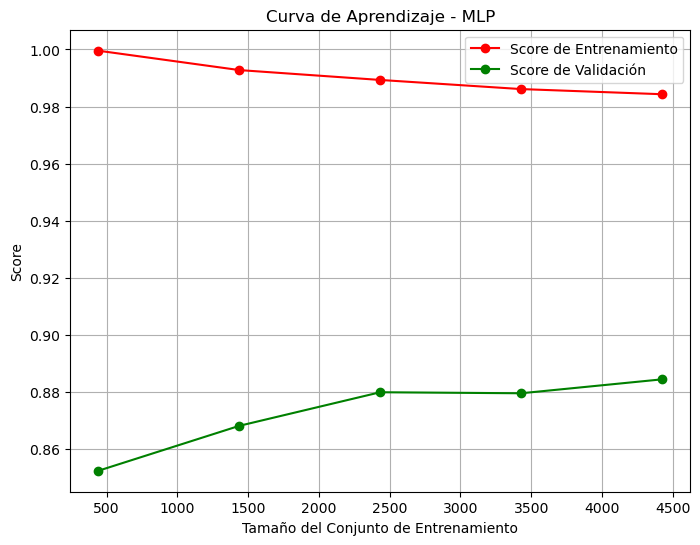

In [38]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Score de Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Score de Validación')
    plt.title(title)
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Curva de aprendizaje para Random Forest
plot_learning_curve(modelo_rf, 'Curva de Aprendizaje - Random Forest', X_train, y_train, cv=5)

# Curva de aprendizaje para MLP
plot_learning_curve(modelo_mlp, 'Curva de Aprendizaje - MLP', X_train, y_train, cv=5)

Al interpretar cada métrica, puedes obtener una visión completa del rendimiento de tus modelos:

    Random Forest:
        Puede tener mejor precisión y AUC, indicando que es más efectivo en evitar falsos positivos y tiene mejor capacidad discriminativa.
        Si su recall es menor que el del MLP, podría estar pasando por alto algunos casos positivos (más falsos negativos).

    MLP:
        Podría tener mejor recall, capturando más casos positivos, pero a costa de una menor precisión (más falsos positivos).
        La curva de pérdida te indica si el modelo ha entrenado adecuadamente o si necesita ajustes.

Decisión sobre el Modelo

La elección entre los modelos depende de:

    Prioridades del Problema:
        Si es crítico evitar falsos negativos (no pasar por alto casos positivos), un modelo con alto recall es preferible (MLP).
        Si es crítico evitar falsos positivos, un modelo con alta precisión es mejor (Random Forest).

    Interpretabilidad:
        Random Forest ofrece interpretabilidad a través de la importancia de las características.
        MLP es más una "caja negra", pero puede capturar relaciones más complejas.

    Rendimiento General:
        Considera todas las métricas y cómo se Al interpretar cada métrica, puedes obtener una visión completa del rendimiento de tus modelos:

    Random Forest:
        Puede tener mejor precisión y AUC, indicando que es más efectivo en evitar falsos positivos y tiene mejor capacidad discriminativa.
        Si su recall es menor que el del MLP, podría estar pasando por alto algunos casos positivos (más falsos negativos).

    MLP:
        Podría tener mejor recall, capturando más casos positivos, pero a costa de una menor precisión (más falsos positivos).
        La curva de pérdida te indica si el modelo ha entrenado adecuadamente o si necesita ajustes.

Decisión sobre el Modelo

La elección entre los modelos depende de:

    Prioridades del Problema:
        Si es crítico evitar falsos negativos (no pasar por alto casos positivos), un modelo con alto recall es preferible (MLP).
        Si es crítico evitar falsos positivos, un modelo con alta precisión es mejor (Random Forest).

    Interpretabilidad:
        Random Forest ofrece interpretabilidad a través de la importancia de las características.
        MLP es más una "caja negra", pero puede capturar relaciones más complejas.

    Rendimiento General:
        Considera todas las métricas y cómo se alinean con tus objetivos.

Recomendaciones Finales

    Analiza las Métricas en Conjunto: No te bases en una sola métrica; considera cómo se complementan.
    Ajusta los Modelos: Utiliza los insights obtenidos para ajustar hiperparámetros y mejorar el rendimiento.
    Considera el Contexto: Aplica conocimiento del dominio para interpretar los resultados y tomar decisiones informadas.alinean con tus objetivos.

Recomendaciones Finales

    Analiza las Métricas en Conjunto: No te bases en una sola métrica; considera cómo se complementan.
    Ajusta los Modelos: Utiliza los insights obtenidos para ajustar hiperparámetros y mejorar el rendimiento.
    Considera el Contexto: Aplica conocimiento del dominio para interpretar los resultados y tomar decisiones informadas.